In [1]:
import platform
from tkinter import Tk

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans

from tools import Sim_Parameters, Train_Parameters, create_dataset, RMSELoss, train_val_test, test_epoch, simulator, ballsINTObins, load_data

%matplotlib widget

In [2]:
air_trans, basis_funcs, spectra, substances_emit = load_data(air_trans_file='./data/Test 2 - 21 Substances/Air transmittance.xlsx',
                                                             basis_func_file='./data/Test 2 - 21 Substances/Basis functions.xlsx',
                                                             spectra_file='./data/Test 2 - 21 Substances/spectra.xlsx', 
                                                             substances_emit_file='./data/Test 2 - 21 Substances/substances.xlsx')


substance_ind_list = list(range(21))
basis_func_ind_list = [0, 1, 2, 3, 4, 5, 6]
temp_list = []

print(substance_ind_list)

sim_params = Sim_Parameters(air_trans=air_trans,
                            air_RI=1,
                            atm_dist_ratio=0.11,
                            basis_funcs=basis_funcs,
                            basis_func_comb=basis_func_ind_list,
                            substance_ind_list=substance_ind_list,
                            spectra=spectra,
                            substances_emit=substances_emit,
                            temp_K=293.15)


mats = []

for i in range(sim_params.num_substances):
    mat = simulator(sim_params, np.expand_dims(substances_emit[:, i], 1))
    mats.append(mat)

mats = np.asarray(mats)

print(mats.shape)



kmeans = KMeans(n_clusters=5).fit(mats)


print(kmeans.labels_)
print(np.where(kmeans.labels_==1)[0])
print(np.where(kmeans.labels_==2)[0])

IntSlider(value=2, continuous_update=False, description='Test:', max=20)

IntSlider(value=0, continuous_update=False, description='cluster:', max=4)

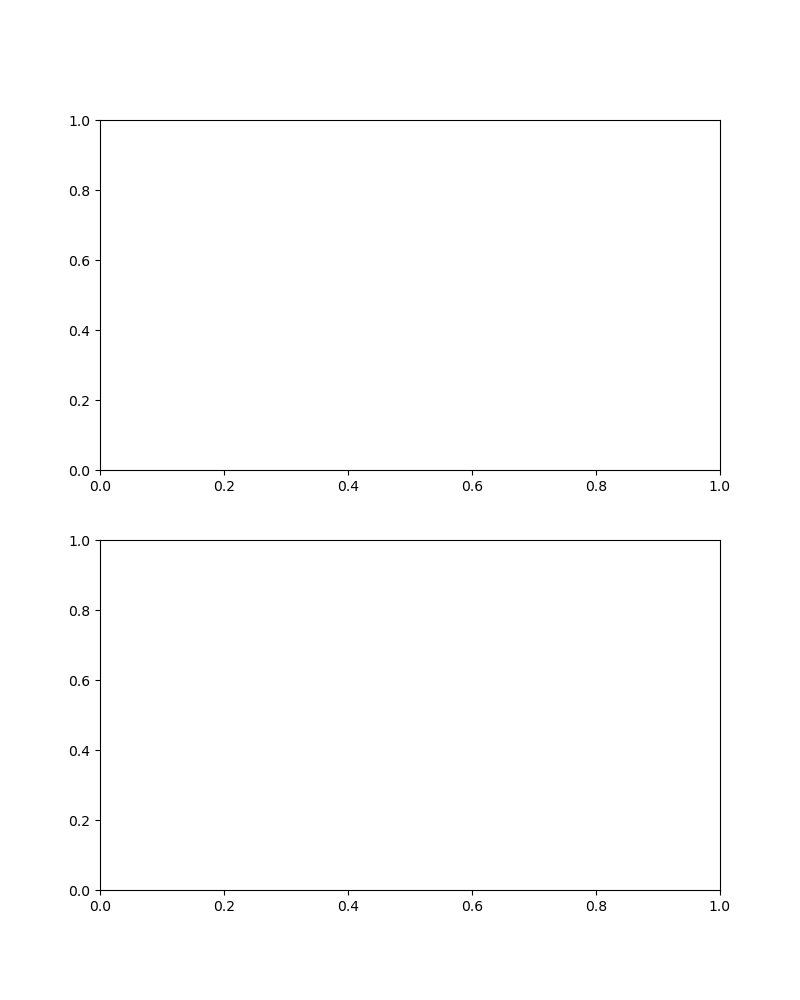

In [9]:
from ipywidgets import widgets

slider = widgets.IntSlider(
    value=2,
    min=0,
    max=20,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def on_value_change(change):
    # print(change['new'])
    axs[1].cla()
    for i in range(int(change['new'])+1):
        axs[1].plot(mats[i])

slider.observe(on_value_change, names='value')


cluster_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=np.max(kmeans.labels_),
    step=1,
    description='cluster:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

def on_cluster_change(change):
    
    axs[0].cla()
    cluster_ind = int(change['new'])
    # for i in range(int(change['new'])+1):
    cluster = mats[np.where(kmeans.labels_==cluster_ind)[0], :]
    axs[0].plot(cluster.transpose())
    axs[0].set_ylim(0,30)

cluster_slider.observe(on_cluster_change, names='value')




fig, axs = plt.subplots(2, figsize=(8, 10))
display(slider)
display(cluster_slider)

# for i in range(len(mats)):
#     ax.plot(mats[i])